In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

dataset=pd.read_csv('cardio_dataset.csv').values

data=dataset[:,0:7]
target=dataset[:,7]

target=np.reshape(target, (-1,1))

print(data[:10])
print(target[:10])
print('size of the dataset:',len(dataset))

[[  2.  48. 236.  66.   0.   2.   0.]
 [  1.  48. 260.  51.   0.   2.   1.]
 [  1.  44. 187.  49.   1.   2.   0.]
 [  2.  42. 216.  57.   1.   2.   0.]
 [  2.  56. 156.  42.   0.   2.   0.]
 [  1.  44. 162.  57.   1.   2.   0.]
 [  1.  50. 244.  47.   0.   2.   0.]
 [  1.  48. 212.  30.   1.   2.   0.]
 [  2.  66. 202.  53.   0.   2.   1.]
 [  1.  63. 186.  46.   1.   2.   0.]]
[[ 1.1]
 [ 7. ]
 [ 7. ]
 [ 0.4]
 [ 2.2]
 [ 3. ]
 [ 4.2]
 [17.4]
 [13.4]
 [17.3]]
size of the dataset: 6644


In [2]:
type(dataset)

numpy.ndarray

In [3]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.2,random_state = 42)

In [4]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()

model.fit(train_data,train_target)
predicted_target=model.predict(test_data)

In [5]:
score_lr=r2_score(test_target,predicted_target)
print("r2 score:",score_lr)


r2 score: 0.7454371901898063


In [6]:
print('Actual Target:',test_target[:10].T)
print('Predicted Target:',predicted_target[:10].T)

Actual Target: [[ 4.9  0.2  2.2  3.5 38.3  1.5  8.3 34.9  4.4  5.4]]
Predicted Target: [[13.25466522 -8.75488528  0.66416184  2.4056147  35.85826637 -0.73016764
  15.04110983 17.53178405  5.36303252  9.80840536]]


In [7]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(train_data)
model_2 = LinearRegression()
model_2.fit(X_poly, train_target)
predicted_target1=model_2.predict(poly_reg.fit_transform(test_data))

In [8]:
score_pol=r2_score(test_target,predicted_target1)
print("r2 score:",score_pol)


r2 score: 0.8554038111944858


In [9]:
print('Actual Target:',test_target[:10].T)
print('Predicted Target:',predicted_target1[:10].T)

Actual Target: [[ 4.9  0.2  2.2  3.5 38.3  1.5  8.3 34.9  4.4  5.4]]
Predicted Target: [[ 8.03138575  1.77272135  6.81694935  3.28047201 48.14270978  0.74723194
   9.89224172 17.39248585  5.56980706  6.39080546]]


In [10]:
from sklearn.svm import SVR 
model_3 = SVR(kernel = 'rbf') 
model_3.fit(data,target.ravel())
predicted_target2=model_3.predict(test_data)

In [11]:

score_svr1=r2_score(test_target,predicted_target2)
print("r2 score:",score_svr1)

r2 score: 0.45101473239222534


In [12]:
from sklearn.svm import SVR 
model_4 = SVR(kernel = 'linear') 
model_4.fit(data,target.ravel())
predicted_target3=model_4.predict(test_data)

In [13]:

score_svr2=r2_score(test_target,predicted_target3)
print("r2 score:",score_svr2)

r2 score: 0.7093773289998118


In [14]:
print('Actual Target:',test_target[:10].T)
print('Predicted Target:',predicted_target2[:10].T)

Actual Target: [[ 4.9  0.2  2.2  3.5 38.3  1.5  8.3 34.9  4.4  5.4]]
Predicted Target: [11.82519168 -1.48023369  1.28511072  5.3248309  13.93310401  1.5711459
 11.82171041 16.88228215  6.09030353 12.41215984]


In [15]:

from sklearn.svm import SVR 
model_5 = SVR(kernel ='poly', degree = 5) 
model_5.fit(data,target.ravel())
predicted_target4=model_5.predict(test_data)

In [16]:

score_svr3=r2_score(test_target,predicted_target4)
print("r2 score:",score_svr3)

r2 score: 0.4569519731815056


In [17]:
from sklearn.tree import DecisionTreeRegressor
model_6 = DecisionTreeRegressor()
model_6.fit(train_data,train_target)
predicted_target5=model_6.predict(test_data)

In [18]:

score_dt=r2_score(test_target,predicted_target5)
print("r2 score:",score_dt)

r2 score: 0.7452134814321336


In [19]:
print('Actual Target:',test_target[:10].T)
print('Predicted Target:',predicted_target3[:10].T)

Actual Target: [[ 4.9  0.2  2.2  3.5 38.3  1.5  8.3 34.9  4.4  5.4]]
Predicted Target: [12.27501641 -6.70634198  0.24399245  2.94028003 29.93057857  0.40798203
 13.15871463 16.30757007  5.06595268  8.79248646]


In [20]:
from sklearn.linear_model import BayesianRidge
model_7 = BayesianRidge()
model_7.fit(train_data,train_target.ravel())
   
predicted_target6 = model_7.predict(test_data)

In [21]:

score_br=r2_score(test_target,predicted_target6)
print("r2 score:",score_br)

r2 score: 0.7454160200448335


In [22]:
from sklearn.linear_model import Ridge, Lasso
model_8 = Lasso()
model_8.fit(train_data,train_target)
predicted_target7=model_8.predict(test_data)

In [23]:

score_ls=r2_score(test_target,predicted_target7)
print("r2 score:",score_ls)


r2 score: 0.6274348506184926


In [24]:
from sklearn.linear_model import Ridge, Lasso
model_9 = Ridge()
model_9.fit(train_data,train_target)
predicted_target8=model_9.predict(test_data)

In [25]:
score_rg=r2_score(test_target,predicted_target8)
print("r2 score:",score_rg)


r2 score: 0.7454226227510454


In [26]:
from sklearn.ensemble import RandomForestRegressor
model_10 = RandomForestRegressor(n_estimators = 1000)
model_10.fit(train_data,train_target.ravel())
predicted_target9=model_10.predict(test_data)

In [27]:
score_rf=r2_score(test_target,predicted_target9)
print("r2 score:",score_rf)


r2 score: 0.8471406011411906


In [28]:
scores = [score_lr,score_pol,score_svr1,score_svr2,score_svr3,score_dt,score_br,score_ls,score_rg,score_rf]
algorithms = ["Linear Regression","Polynomial Regression","Support Vector Regression with RBf kernel","Support Vector Regression with Linear kernel","Support Vector Regression with Poly kernel","Decision Tree Regression","BayesianRidge","Lasso","Ridge ","Random Forest Regression"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i]))

The accuracy score achieved using Linear Regression is: 0.7454371901898063
The accuracy score achieved using Polynomial Regression is: 0.8554038111944858
The accuracy score achieved using Support Vector Regression with RBf kernel is: 0.45101473239222534
The accuracy score achieved using Support Vector Regression with Linear kernel is: 0.7093773289998118
The accuracy score achieved using Support Vector Regression with Poly kernel is: 0.4569519731815056
The accuracy score achieved using Decision Tree Regression is: 0.7452134814321336
The accuracy score achieved using BayesianRidge is: 0.7454160200448335
The accuracy score achieved using Lasso is: 0.6274348506184926
The accuracy score achieved using Ridge  is: 0.7454226227510454
The accuracy score achieved using Random Forest Regression is: 0.8471406011411906


In [29]:
final_data = pd.DataFrame({'Models' :["LR","PR","S-Rbf","S-LIN","S-Poly ","DTR","BR","LS","RI ","RFR"],
'Accuracy' : [score_lr,score_pol,score_svr1,score_svr2,score_svr3,score_dt,score_br,score_ls,score_rg,score_rf] })

In [30]:
final_data

,Models,Accuracy
0,LR,0.745437
1,PR,0.855404
2,S-Rbf,0.451015
3,S-LIN,0.709377
4,S-Poly,0.456952
5,DTR,0.745213
6,BR,0.745416
7,LS,0.627435
8,RI,0.745423
9,RFR,0.847141


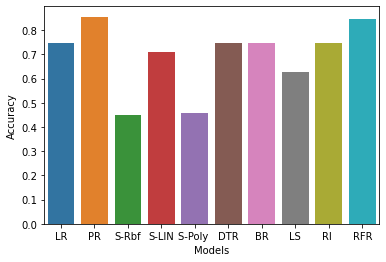

In [31]:
sns.barplot(final_data['Models'],final_data['Accuracy'])

In [32]:
import joblib

joblib.dump(model,'heart_risk_prediction_regression_model.sav')

['heart_risk_prediction_regression_model.sav']